In [261]:
import os
import warnings
warnings.simplefilter('ignore')

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [263]:
joy = os.listdir("C:\\Users\\admin\\Desktop\\joy")

In [264]:
sad = os.listdir("C:\\Users\\admin\\Desktop\\sorrow")

In [265]:
happy = os.listdir("C:\\Users\\admin\\Desktop\\happy")

In [266]:
limit = 7
j=0
joy_img = [None]*limit
for i in joy:
    if j<limit:
        joy_img[j] = imread("C:\\Users\\admin\\Desktop\\joy\\"+i)
        j+=1
    else:
        break

In [267]:
j=0
sad_img = [None]*limit
for i in sad:
    if j<limit:
        sad_img[j] = imread("C:\\Users\\admin\\Desktop\\sorrow\\"+i)
        j+=1
    else:
        break

In [268]:
j=0
happy_img = [None]*limit
for i in happy:
    if j<limit:
        happy_img[j] = imread("C:\\Users\\admin\\Desktop\\happy\\"+i)
        j+=1
    else:
        break

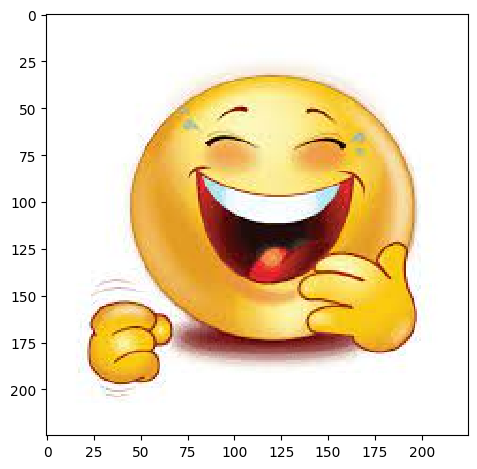

In [269]:
imshow(joy_img[5])
plt.show()

In [270]:
import numpy as np
from skimage.color import rgb2gray

joy_gray = []  # Use a list to store gray images
j = 0

for i in joy:
    if j < limit and j < len(joy_img):  # Ensure j is within bounds of joy_img
        rgb_image = joy_img[j]
        
        # Check if the image has 4 channels (RGBA) and convert to RGB
        if rgb_image.shape[2] == 4:
            rgb_image = rgb_image[:, :, :3]  # Drop the alpha channel
        
        joy_gray.append(rgb2gray(rgb_image))  # Append the grayscale image
        j += 1
    else:
        break


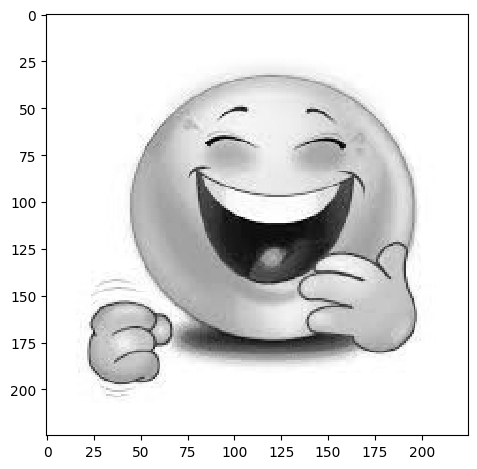

In [271]:
imshow(joy_gray[5])
plt.show()

In [272]:
sad_gray = [None]*limit
j=0
for i in sad:
    if j<limit:
        sad_gray[j]=rgb2gray(sad_img[j])
        j+=1
    else:
        break

In [273]:
happy_gray = [None]*limit
j=0
for i in happy:
    if j<limit:
        happy_gray[j]=rgb2gray(happy_img[j])
        j+=1
    else:
        break

In [274]:
for i in range(7):
    print(joy_gray[i].shape)

(225, 225)
(225, 225)
(225, 225)
(225, 225)
(225, 225)
(225, 225)
(225, 225)


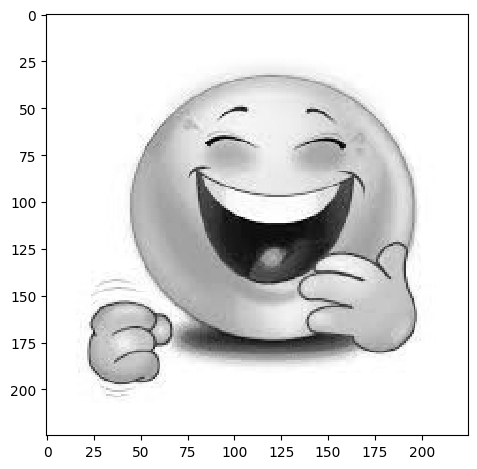

In [275]:
imshow(joy_gray[5])
plt.show()

In [276]:
for i in range(7):
    t = joy_gray[i]
    joy_gray[i]=resize(t,(512,512))

In [277]:
for i in range(7):
    y = sad_gray[i]
    sad_gray[i]=resize(y,(512,512))

In [278]:
for i in range(7):
    d = happy_gray[i]
    happy_gray[i]=resize(d,(512,512))

In [279]:
len_t = len(joy_gray)
len_y = len(sad_gray)
len_d = len(happy_gray)

In [280]:
size_t = joy_gray[1].shape
size_y = sad_gray[1].shape
size_d = happy_gray[1].shape

In [281]:
size_t

(512, 512)

In [282]:
flattensize_t = size_t[1]*size_t[0]
flattensize_y = size_y[1]*size_y[0]
flattensize_d = size_d[1]*size_d[0]

In [283]:
flattensize_t

262144

In [284]:
print(flattensize_t,flattensize_y,flattensize_d)

262144 262144 262144


In [285]:
for i in range(len_t):
    joy_gray[i] = np.ndarray.flatten(joy_gray[i]).reshape(flattensize_t,1)

In [286]:
for i in range(len_y):
    sad_gray[i] = np.ndarray.flatten(sad_gray[i]).reshape(flattensize_y,1)

In [287]:
for i in range(7):
    happy_gray[i] = np.ndarray.flatten(happy_gray[i]).reshape(flattensize_d,1)

In [288]:
joy_gray = np.dstack(joy_gray)
sad_gray = np.dstack(sad_gray)
happy_gray = np.dstack(happy_gray)

In [289]:
joy_gray.shape

(262144, 1, 7)

In [290]:
joy_gray=np.rollaxis(joy_gray,axis=2,start=0)
sad_gray=np.rollaxis(sad_gray,axis=2,start=0)
happy_gray=np.rollaxis(happy_gray,axis=2,start=0)

In [291]:
joy_gray=joy_gray.reshape(len_t,flattensize_t)
sad_gray=sad_gray.reshape(len_y,flattensize_y)
happy_gray=happy_gray.reshape(len_d,flattensize_d)

In [292]:
joy_gray.shape

(7, 262144)

In [293]:
joy_data = pd.DataFrame(joy_gray)
joy_data['label'] = "peacefull"
sad_data = pd.DataFrame(sad_gray)
sad_data['label'] = "sad"
happy_data = pd.DataFrame(happy_gray)
happy_data['label'] = "enjoying"

In [294]:
data1 = pd.concat([joy_data,sad_data])
data = pd.concat([data1,happy_data])

In [295]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [296]:
from sklearn.utils import shuffle

In [297]:
data_index = shuffle(data).reset_index()

In [298]:
emoji_data = data_index.drop(['index'],axis=1)

In [299]:
emoji_data.to_csv("Emoji.csv")

In [300]:
x = emoji_data.values[:,:-1]
y = emoji_data.values[:,-1]

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [303]:
from sklearn import decomposition

In [304]:
pca = decomposition.PCA(n_components=20, whiten=True, random_state=1)

In [305]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Assuming x_train is your data and is already defined
n_components = 20  # Desired number of components
pca = PCA(n_components=min(16, n_components))  # Use 16 or fewer
pca.fit(x_train)

PCA(n_components=16)

In [306]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [307]:
eigen = (np.reshape(x[10],(512,512)).astype(np.float64))

In [308]:
eigen

array([[0.99435892, 0.99386872, 0.99558441, ..., 0.92434357, 0.92310875,
        0.92346156],
       [0.99388404, 0.99339384, 0.99510953, ..., 0.92415065, 0.92270807,
        0.92312024],
       [0.99560738, 0.99511719, 0.99683287, ..., 0.92485076, 0.92416214,
        0.92435889],
       ...,
       [0.96984073, 0.97072443, 0.9676315 , ..., 0.96382183, 0.96209442,
        0.96258796],
       [0.9895515 , 0.99086603, 0.98626518, ..., 0.93964114, 0.9341439 ,
        0.93571454],
       [0.98412009, 0.9853159 , 0.98113056, ..., 0.94630426, 0.94184582,
        0.94311966]])

In [309]:
fig = plt.figure(figsize=(30,30))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=plt.cm.bone)

In [310]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score

In [311]:
RF = RandomForestClassifier()
RF.fit(x_train_pca, y_train)

RandomForestClassifier()

In [312]:
y_pred=RF.predict(x_test_pca)

In [313]:
y_pred

array(['sad', 'peacefull', 'peacefull', 'sad', 'enjoying'], dtype=object)

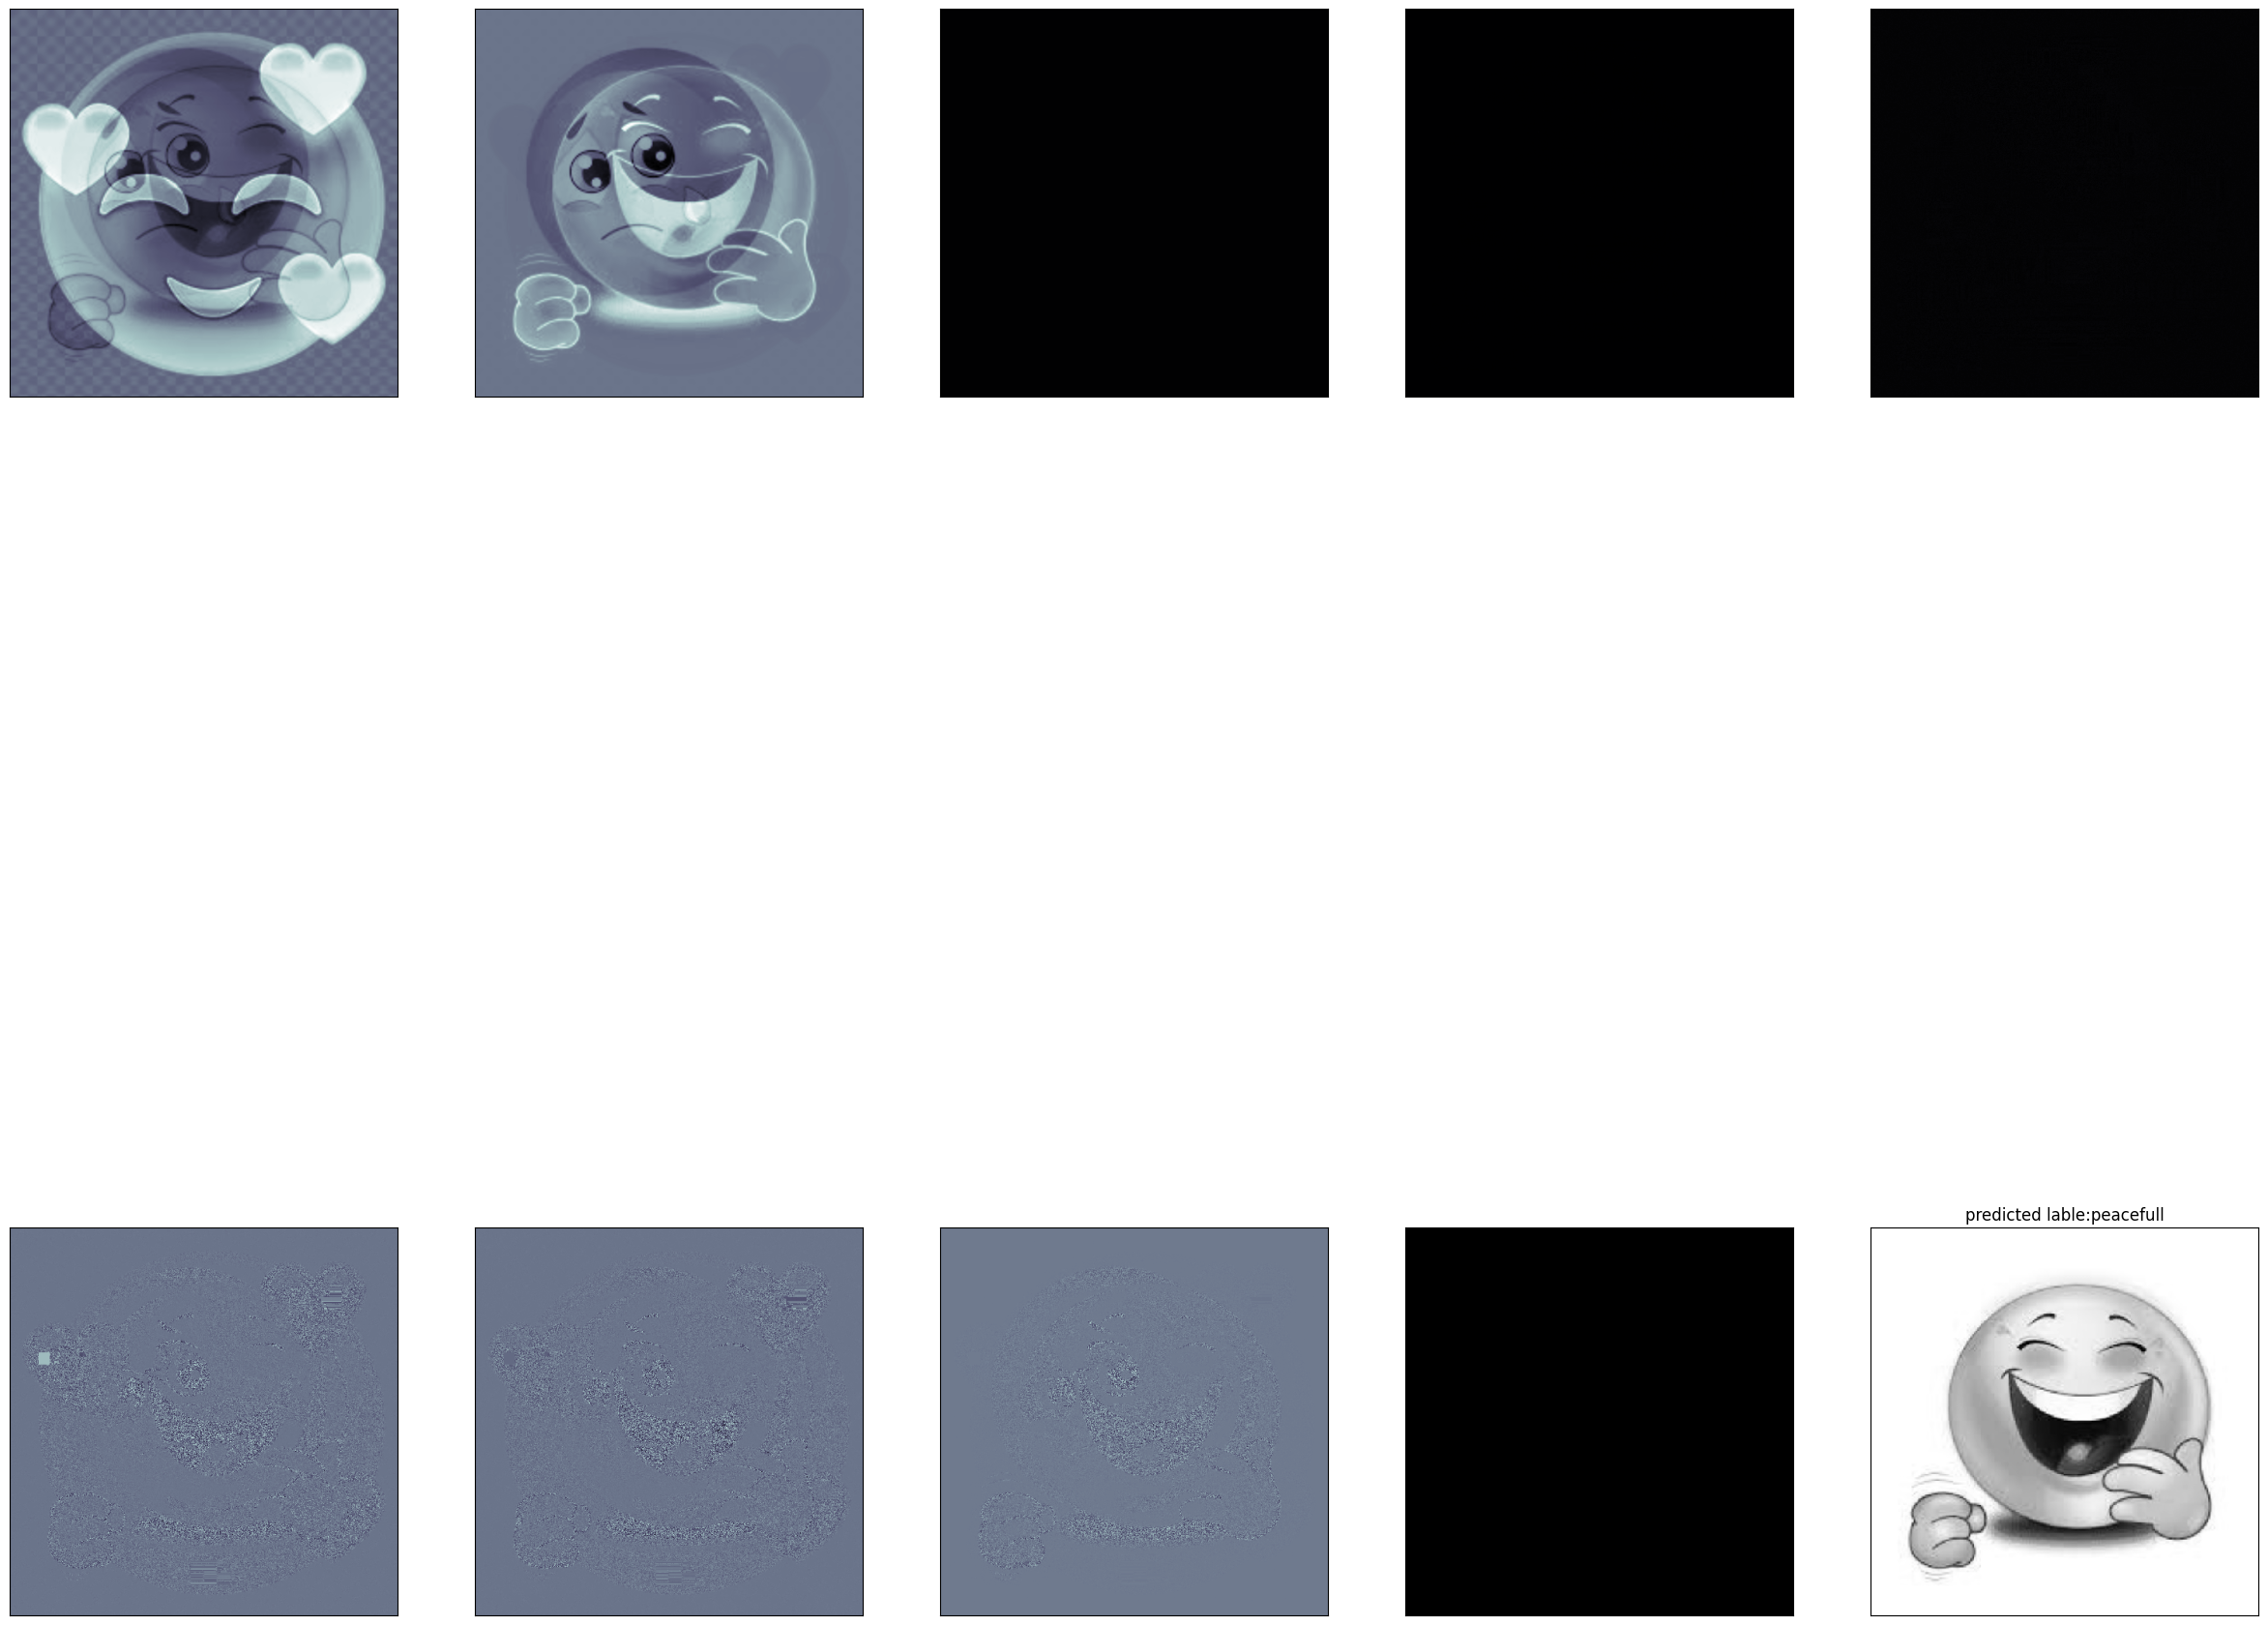

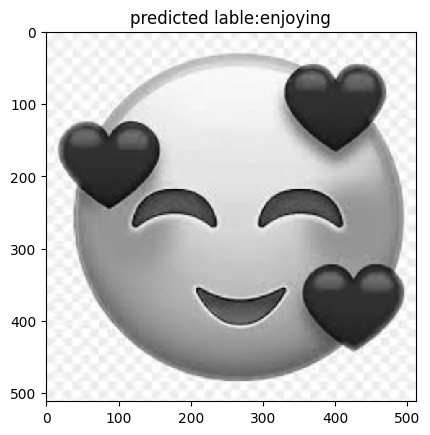

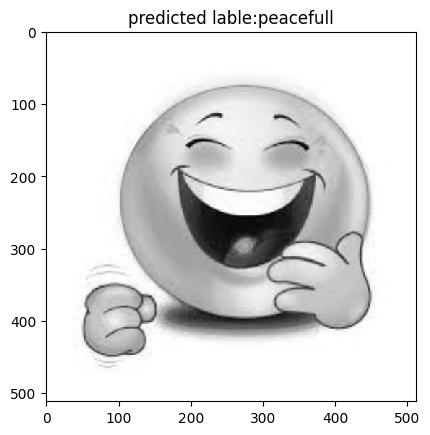

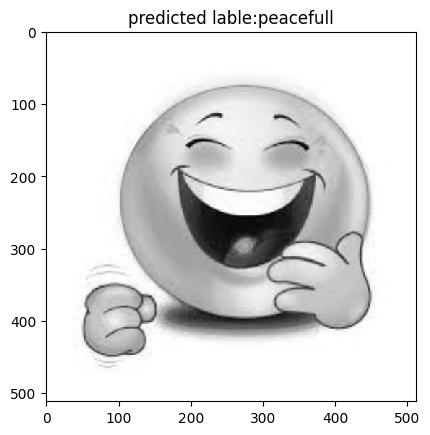

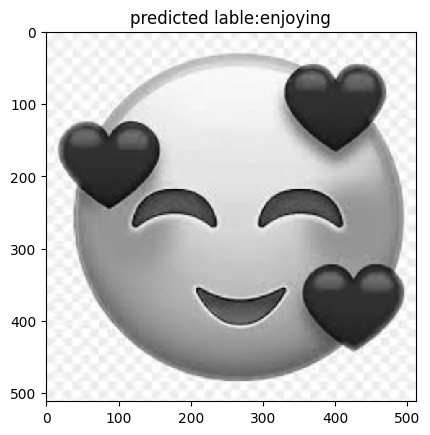

In [314]:
for i in (np.random.randint(0,5,5)):
    predicted_image=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted lable:{0}'.format(y_pred[i]))
    plt.imshow(predicted_image, interpolation='nearest',cmap='gray')
    plt.show()

In [315]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train_pca, y_train)
y_pred = RF.predict(x_test_pca)

In [316]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


In [317]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    enjoying       1.00      1.00      1.00         1
   peacefull       1.00      1.00      1.00         2
         sad       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
confusion_matrix(y_test,y_pred)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 2]])